In [1]:
#importing libraries

import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("secom.csv", delimiter=" ",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


## PCA Assignment Questions: 
    
1) Handle the missing values in the data.

2) Create the Covariance Matrix for all the features in the data.

3) Calculate the Eigen Values and Eigen Vectors

4) Plot the amount of variance that is preserved across each principal component and try to figure out the optimal number of principal components that we can get.

5) Finally make a list of top 7 principal-components based values of their variances.

In [13]:
#Calculate the number of missing values in the dataframe

missing_values = [df[x].isna().sum() for x in df.columns]

In [17]:
# Fill the missing values with the mean
for i in range(590):
#     data[i]data[i].replace("NaN",data[i].mean())
    df[i].fillna(value=data[i].mean(),inplace=True)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.005396,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.005396,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


In [19]:
#Check for any null values
df.isnull().values.any()

False

## 2) Create the Covariance Matrix for all the features in the data.

In [20]:
from sklearn.preprocessing import StandardScaler
std_df=StandardScaler().fit_transform(df)
std_data = pd.DataFrame(std_df)
std_data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.224309,0.849725,-0.436273,0.033555,-0.050580,0.0,-0.563790,0.266269,0.509826,1.128417,...,4.436053e-16,5.175234e-16,0.118699,-0.204890,-0.093207,-0.197113,-2.528283e-15,-2.759188e-15,-6.054371e-15,-1.665950e-15
1,1.107136,-0.382910,1.017137,0.153067,-0.060045,0.0,0.198217,0.322244,0.456999,0.022582,...,3.089342e-01,2.007880e+00,0.530203,0.406679,0.444706,0.385059,-9.601744e-01,4.118532e-01,2.501244e-01,1.156689e+00
2,-1.114158,0.799102,-0.481289,0.686213,-0.047906,0.0,-0.906210,0.255074,-0.260907,0.327183,...,4.809624e+00,-2.744816e-01,-1.262780,0.022264,0.014375,0.029833,2.991151e+00,3.627063e+00,3.321419e+00,-1.791486e-01
3,-0.350312,-0.198875,-0.051547,-1.106948,-0.051290,0.0,0.503246,-0.013602,0.343218,-0.765408,...,-5.093731e-01,-4.386698e-01,-0.322199,-0.292257,-0.362164,-0.283417,-1.018947e-01,-1.789275e-01,-3.082928e-01,-2.752459e-01
4,0.242143,0.087526,1.117387,-0.158919,-0.047492,0.0,-0.115382,0.187905,0.545044,-0.149584,...,4.436053e-16,5.175234e-16,-5.906899,26.867231,27.071425,26.913347,-1.018947e-01,-1.789275e-01,-3.082928e-01,-2.752459e-01


In [21]:
covar_matrix = np.matmul(std_data.T,std_data)
covar_matrix.shape

(590, 590)

## 3) Calculate the Eigen Values and Eigen Vectors

In [23]:
from scipy.linalg import eigh 
values, vectors = eigh(covar_matrix, eigvals=(588,589))
print("Shape of eigen vectors = ",vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

('Shape of eigen vectors = ', (590, 2))
('Updated shape of eigen vectors = ', (2, 590))


In [24]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, std_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", std_data.T.shape," = ", new_coordinates.shape)

(" resultanat new data points' shape ", (2, 590), 'X', (590, 1567), ' = ', (2, 1567))


## 4) Plot the amount of variance that is preserved across each principal component and try to figure out the optimal number of principal components that we can get.

In [26]:
from sklearn import decomposition
pca = decomposition.PCA()

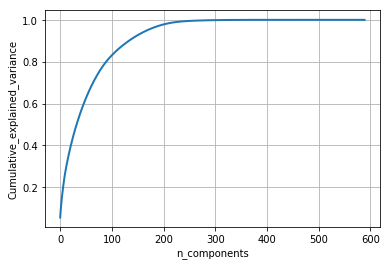

In [27]:
pca.n_components = 590
pca_data = pca.fit_transform(std_data)
# print("shape of pca_reduced.shape = ", pca_data.shape)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


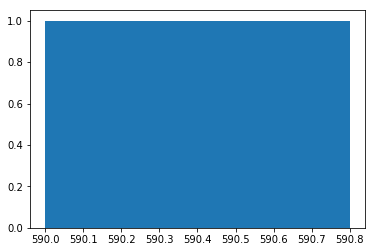

In [30]:
plt.bar(pca.n_components,cum_var_explained,align='edge')
plt.show()

## 5) Finally make a list of top 7 principal-components based values of their variances.

In [31]:
pca.n_components=7
principalComponents = pca.fit_transform(std_data)
principaldf = pd.DataFrame(data=principalComponents,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [32]:
principaldf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-1.688352,2.880573,3.783001,-2.658448,-0.560934,-1.190494,-1.753030
1,-2.232079,0.793452,2.804449,-2.099644,-0.568415,-1.587597,-2.205068
2,0.414683,1.127818,1.247032,-0.450879,0.338916,2.222687,-2.124888
3,1.167008,5.246588,4.806123,-4.383489,1.610268,2.352830,-8.051654
4,0.780186,2.394270,2.605574,-0.238746,1.525024,3.746156,-4.653006
5,2.106344,2.861104,3.691955,-2.633480,0.873540,3.694604,-2.284806
6,-1.744294,4.490906,2.808326,-1.542166,0.029132,-1.256375,-2.992298
7,1.316370,1.896552,4.706302,-2.532226,-0.482622,1.586615,-2.326425
8,-0.492088,19.233057,-3.140117,3.331833,0.181911,2.513588,-0.479368
9,1.319231,3.855124,5.692344,-3.242280,-0.240406,2.643469,-2.304767
